### Questions
- Does cholera cause dehydration?
- Is the gastric acid index correlated to feces consistency and vomit color?

## Cleaning

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('cholera-dataset.csv', index_col=0)

In [5]:
df.columns

Index(['age', 'sex', 'dh', 'rbp', 'c', 'seizures', 'vc', 'ia', 'bt0', 'fc',
       'exposed_to', 'fever', 'cholera'],
      dtype='object')

In [6]:
df.shape

(303, 13)

In [7]:
df.columns = ['age', 'sex', 'dehidration', 'blood_pressure', 'cholesterol', 'seizures', 'vomit_color', 'gastric_acid',
              'blood_type', 'feces', 'exposure', 'fever', 'cholera']

In [9]:
df.head()

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [8]:
df.dtypes

age                 int64
sex                object
dehidration         int64
blood_pressure      int64
cholesterol       float64
seizures            int64
vomit_color         int64
gastric_acid        int64
blood_type          int64
feces               int64
exposure            int64
fever               int64
cholera             int64
dtype: object

In [13]:
df.isna().sum()

age               0
sex               0
dehidration       0
blood_pressure    0
cholesterol       5
seizures          0
vomit_color       0
gastric_acid      0
blood_type        0
feces             0
exposure          0
fever             0
cholera           0
dtype: int64

We will not drop the rows with missing values for cholesterol since it is not related to the questions we need to answer.

In [20]:
df[df.cholesterol.isnull()]

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
99,53,Male,2,130,NaN,1,0,173,0,2,3,0,1
134,41,Female,1,126,NaN,0,1,163,0,2,0,0,1
135,49,Female,0,130,NaN,0,1,163,0,2,0,0,1
260,66,Female,0,178,NaN,1,1,165,1,1,2,0,0
298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0


In [21]:
df.describe()

,age,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [29]:
df[df.exposure == 4]

,age,sex,dehidration,blood_pressure,cholesterol,seizures,vomit_color,gastric_acid,blood_type,feces,exposure,fever,cholera
92,52,Male,2,138,223.0,0,1,169,0,2,4,0,1
158,58,Male,1,125,220.0,0,1,144,0,1,4,0,1
163,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
164,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
251,43,Male,0,132,247.0,1,0,143,1,1,4,0,0


We have 5 rows with exposure 4 which is not present in the cookbook. Since exposure is not related to our questions we will not drop them.

## Analysis for question 1
- Does cholera cause dehydration?

Creating cross table.

In [53]:
cross_tab = pd.crosstab(df.dehidration, df.cholera)

In [91]:
cross_tab = cross_tab.transpose()

Plotting heatmap for initial correlation check.

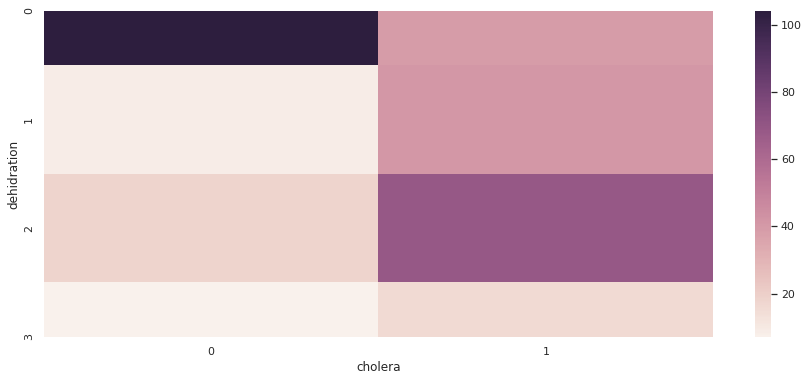

In [59]:
plt.figure(figsize=(15, 6))
sns.heatmap(cross_tab, cmap=sns.cubehelix_palette(light=.95, as_cmap=True), )

Running a chi2 test.

Since we are working with categorical variables, we can perform a chi-squared test to analyse if two variables are dependent or not. In this case, we will analyse whether dehydration level and colera are independent or not. 

`Hypotheses`: 

$H_O$: cholera and dehydration level are independent

$H_A$: cholera and dehydration level are dependent 


In [92]:
stat, p, dof, expected = stats.chi2_contingency(cross_tab)
critical = stats.chi2.ppf(prob, dof)

In [113]:
print(f'The p-value is {p} and the critical value is {critical}')

The p-value is 1.3343043373050064e-17 and the critical value is 7.814727903251179


In this case, `alpha = 0.05`, so we are calculating a confidence interval for 95%

According to the results and based on a chi-squared distribution we can say that the confidence interval will be between 0 and 7.81. 

CI = [0, 7.81]

Then, according to the hypotheses test we can say 

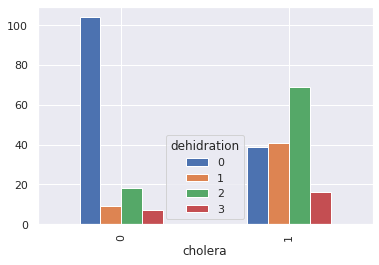

In [109]:
cross_tab.plot.bar()